2022-05-24  <br/>
Women's Rugby <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-05-24/readme.md

Comparison bar plot - Completed

https://stackoverflow.com/questions/32589829/how-to-get-value-counts-for-multiple-columns-at-once-in-pandas-dataframe <br/>

https://towardsai.net/p/l/tips-and-tricks-for-plotly-bar-chart 

In [28]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-24/fifteens.csv')
df.head()

,test_no,date,team_1,score_1,score_2,team_2,venue,home_test_no,away_test_no,series_no,tournament,margin_of_victory,home_away_win,winner,loser
0,1,1982-06-13,Netherlands,0,4,France,Utrecht,1,1,1,Friendly,4,A,France,Netherlands
1,2,1983-06-05,France,10,0,Netherlands,La Teste,2,2,2,Friendly,10,H,France,Netherlands
2,3,1984-05-27,Netherlands,0,3,France,Hilversum,3,3,3,Friendly,3,A,France,Netherlands
3,4,1984-12-31,Sweden,0,34,Netherlands,Malmö,1,4,1,Friendly,34,A,Netherlands,Sweden
4,5,1985-06-02,France,20,0,Netherlands,Bourg en Bresse,4,5,4,Friendly,20,H,France,Netherlands


In [10]:
# Which team participated the most

counts_df =df[['team_1','team_2']].melt(var_name='columns', value_name='country')

In [11]:
counts_df.country.value_counts()

England        296
France         256
Wales          215
Scotland       214
Ireland        187
              ... 
Bahamas          2
Senegal          2
Guatemala        1
Venezuela        1
El Salvador      1
Name: country, Length: 73, dtype: int64

In [12]:
df_eng= df[(df.team_1=='England' )| (df.team_2=='England')]

In [13]:
df_eng

,test_no,date,team_1,score_1,score_2,team_2,venue,home_test_no,away_test_no,series_no,tournament,margin_of_victory,home_away_win,winner,loser
12,13,1987-04-05,Wales,4,22,England,Pontypool Park,1,1,1,Friendly,18,A,England,Wales
18,19,1988-04-24,Wales,6,36,England,Newport RFC,2,2,2,Friendly,30,A,England,Wales
26,27,1988-10-15,England,40,0,Sweden,Waterloo,3,5,1,Friendly,40,H,England,Sweden
29,30,1989-02-12,England,38,4,Wales,Moseley RFC,4,4,3,Friendly,34,H,England,Wales
35,36,1990-02-11,Wales,12,18,England,Neath RFC,5,5,4,Friendly,6,A,England,Wales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1473,2022-03-26,Scotland,5,57,England,"Dam Health Stadium, Edinburgh",210,292,31,6 Nations,52,A,England,Scotland
1455,1479,2022-02-03,Italy,0,74,England,Parma,165,293,23,6 Nations,74,A,England,Italy
1456,1480,2022-04-09,England,58,5,Wales,"Kingsholm, Gloucester",294,213,38,6 Nations,53,H,England,Wales
1461,1485,2022-04-25,England,69,0,Ireland,Leicester,295,186,30,6 Nations,69,H,England,Ireland


In [15]:
df_eng.winner.value_counts()

England          249
New Zealand       18
France            14
Draw               4
Canada             3
Scotland           2
Wales              2
Ireland            2
United States      1
Spain              1
Name: winner, dtype: int64

In [16]:
df_eng.loser.value_counts()

England          43
France           38
Wales            36
Scotland         29
Canada           28
Ireland          28
Italy            23
United States    18
Spain            14
New Zealand      10
South Africa      5
Australia         5
Netherlands       4
Draw              4
Sweden            3
Kazakhstan        3
Russia            2
Samoa             2
Germany           1
Name: loser, dtype: int64

In [14]:
df_eng.groupby(['tournament'])['margin_of_victory'].mean()

tournament
5 Nations                35.250000
6 Nations                35.019417
Canada Cup               20.000000
Churchill Cup            15.400000
European Championship    29.666667
FIRA                     25.636364
Friendly                 23.067568
Home Nations             21.000000
Nations Cup              18.714286
Super Series             16.300000
World Cup                28.052632
Name: margin_of_victory, dtype: float64

In [30]:
df_eng_win

,tournament,margin_of_victory
0,5 Nations,35.0
1,6 Nations,39.0
2,Canada Cup,20.0
3,Churchill Cup,10.0
4,European Championship,30.0
5,FIRA,33.0
6,Friendly,25.0
7,Home Nations,23.0
8,Nations Cup,20.0
9,Super Series,13.0


In [36]:
# Finiding average margain of wins and losses within each tournament 
df_eng_win =df_eng[df_eng.winner=='England'].groupby('tournament')['margin_of_victory'].mean().round(0).reset_index()
df_eng_lose = df_eng[df_eng.loser == 'England'].groupby('tournament')['margin_of_victory'].mean().round(0).reset_index()


In [37]:
df_eng_lose['margin_of_victory_final']=df_eng_lose['margin_of_victory']
df_eng_lose['margin_of_victory']=df_eng_lose['margin_of_victory']*-1
df_eng_lose

,tournament,margin_of_victory,margin_of_victory_final
0,6 Nations,-7.0,7.0
1,Canada Cup,-19.0,19.0
2,Churchill Cup,-38.0,38.0
3,FIRA,-7.0,7.0
4,Friendly,-15.0,15.0
5,Home Nations,-3.0,3.0
6,Nations Cup,-9.0,9.0
7,Super Series,-23.0,23.0
8,World Cup,-13.0,13.0


In [29]:
from plotly.subplots import make_subplots

In [65]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_yaxes=True, horizontal_spacing=0)

fig.append_trace(go.Bar(x=df_eng_lose.margin_of_victory, y=df_eng_lose.tournament,
                        orientation='h', showlegend=True, 
                        text=df_eng_lose.margin_of_victory_final, 
                        name='Matches Lost',
                        marker_color='#221f1f'), 1, 1)

fig.append_trace(go.Bar(x=df_eng_win.margin_of_victory, y=df_eng_win.tournament, 
                        orientation='h', showlegend=True,
                        #text=df_eng_win.margin_of_victory,
                        name='Matches Won', marker_color='#b20710'), 1, 2)


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)

fig.update_traces(hovertemplate=None)

fig.update_layout(title='England\'s Average Rugby Performance',
                  margin=dict(t=80, b=0, l=70, r=40),
                  autosize=False,
                  width=1000,
                  height=1000,
                  hovermode="y unified", 
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93',
                                  family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  legend=dict(orientation="h", yanchor="bottom",
                              y=1, xanchor="center", x=0.5),
                  hoverlabel=dict(bgcolor="black", font_size=13, 
                                  font_family="Lato, sans-serif"))

fig.add_annotation(dict(x=0.95, y=0.7, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "England domiates the <br> competion in the <br> 5 Nations and <br> the European Championships"
                  ))

fig.add_annotation(dict(x=0.2, y=0.30, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "The Super Series is not England\'s best cup of tea"
                  ))
fig.show()

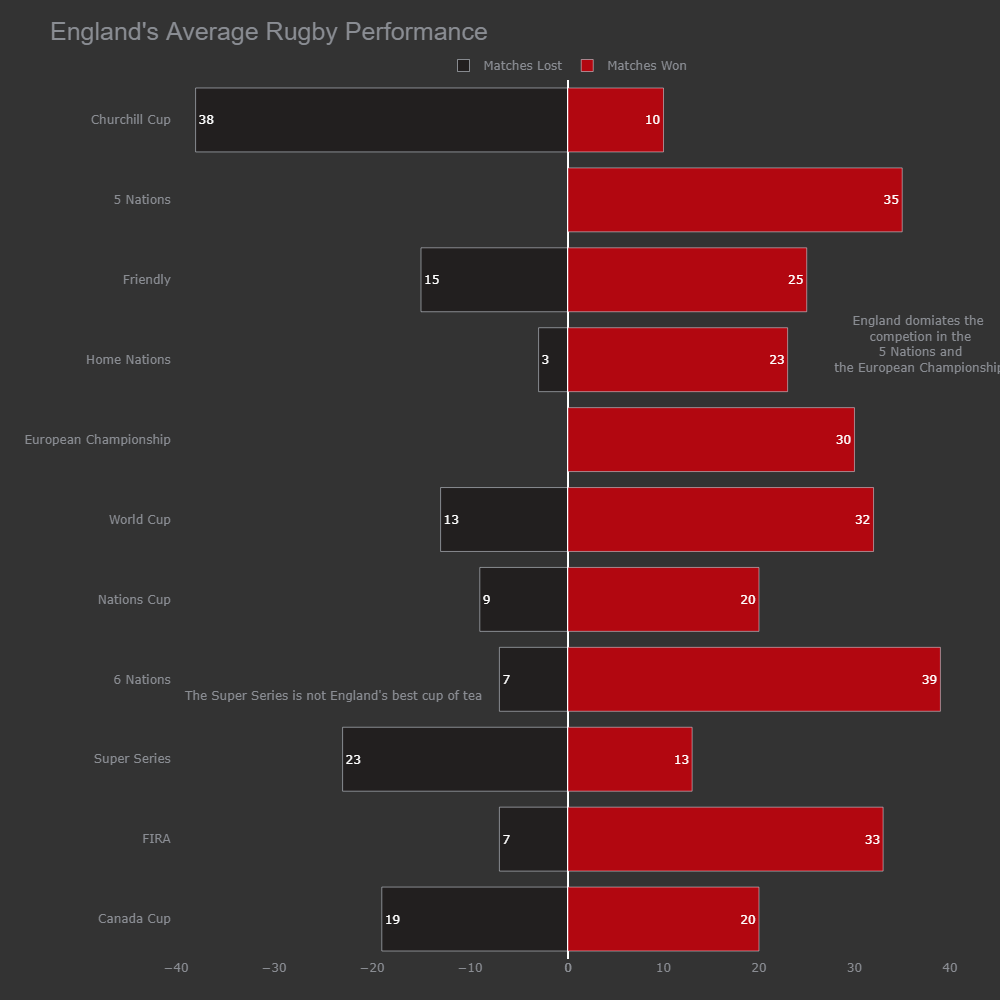

In [63]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)